In [1]:
import import_ipynb                #pip install import_ipynb
from NimbRoNet2 import *
from Utils import *
from Transformation import *
from CustomDataset import *
import torch
import sys
import torch.optim as optim
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

if torch.cuda.is_available():
    avDev = torch.device("cuda")
else:
    avDev = torch.device("cpu")

batch_size = 5

print("Device : ",avDev)
print("Python Version : ",sys.version)
print("Pytorch Version : ",torch.__version__)

importing Jupyter notebook from NimbRoNet2.ipynb
importing Jupyter notebook from Utils.ipynb
importing Jupyter notebook from Transformation.ipynb
importing Jupyter notebook from CustomDataset.ipynb
Device :  cuda
Python Version :  3.7.5 (default, Oct 25 2019, 15:51:11) 
[GCC 7.3.0]
Pytorch Version :  1.3.1


In [2]:
train_transforms = [Rescale((480,640)),
              RandomVerticalFlip(),
              RandomHorizontalFlip(),
              ColorJitter(brightness=0.5, 
                          contrast=0.5, 
                          saturation=0.5,
                          hue = 0.5),
              ToTensor(), 
              Normalize([0.485, 0.456, 0.406], 
                        [0.229, 0.224, 0.225])]

train_dataset = BlobTrainDataset(path = '../Project/data/blob/forceTrain',transform=train_transforms)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)



#print_dataloader(train_loader, num_of_image= 3, avDev = avDev)

print("Blob Train Dataset : ",len(train_dataset))

seg_train_dataset = SegDataset(path = '../Project/data/segmentation/dataset', transform= None)
seg_train_loader = torch.utils.data.DataLoader(dataset=seg_train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

print("Segmentation Train Dataset : ",len(seg_train_dataset))

# for i, test_data in enumerate(seg_train_loader):

#     plt.figure(figsize=(50,25))
#     print(test_data[0].size())
#     plt.imshow(torchvision.utils.make_grid(test_data[0], nrow=5).permute(1, 2, 0))
#     plt.show()
#     plt.figure(figsize=(50,25))
# #     plt.imshow(torchvision.utils.make_grid(test_data[1], nrow=1).permute(1, 2, 0))
#     print(test_data[1].size)
#     plt.imshow(torchvision.utils.make_grid(test_data[1][0], nrow=5).permute(1, 2, 0))
#     plt.show()
# #     print(np.array(test_data[1][0]))
#     raise KeyboardInterrupt

Blob Train Dataset :  3598
Segmentation Train Dataset :  1108


In [3]:
model = NimbRoNet2()
model.to(avDev)

criterion_blob = nn.MSELoss()
criterion_seg = nn.CrossEntropyLoss()

criterion_blob.to(avDev)
criterion_seg.to(avDev)

optimizer = optim.Adam([
                        {"params":model.e_block1.parameters(), "lr": 0.000001},
                        {"params":model.e_block2.parameters(), "lr": 0.000001},
                        {"params":model.e_block3.parameters(), "lr": 0.000001},
                        {"params":model.e_block4.parameters(), "lr": 0.000001},
                        {"params":model.d_block1.parameters()},
                        {"params":model.d_block2.parameters()},
                        {"params":model.d_block3.parameters()},
                        {"params":model.d_block4.parameters()},
                        {"params":model.conv_1_1.parameters()},
                        {"params":model.conv_1_2.parameters()},
                        {"params":model.conv_1_3.parameters()}], lr=0.001)

checkpoint = torch.load("../model.pth")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
no_epoch = checkpoint['epoch']
print("No of epoch : ",no_epoch)
train_loss_1 = checkpoint['train_loss1']

No of epoch :  9


In [4]:
# total_loss = 0.0
# loss_details = [None]*100
# train_loss = 0.0

# combined_loader = [train_loader, seg_train_loader]

# for epoch in range(no_epoch , no_epoch + 5):

#     print("epoch",epoch)
#     train_loss, model = train_model(model, "blob", combined_loader, criterion_blob, criterion_seg, optimizer, avDev)
#     loss_details[epoch] = train_loss
#     print("train loss",train_loss)
#     total_loss += train_loss
#     #print("total loss", total_loss)

In [5]:
# torch.save({
#             'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'train_loss1': loss_details,
#             }, "../model.pth")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Recall of Ball 1.0
Recall of Goalpost 0.5
Recall of Robot 0.67
FDR of Ball 0.0
FDR of Goalpost 0.38
FDR of Robot 0.12
Total recall 0.72
Total FDR 0.17
Accuracy 0.45


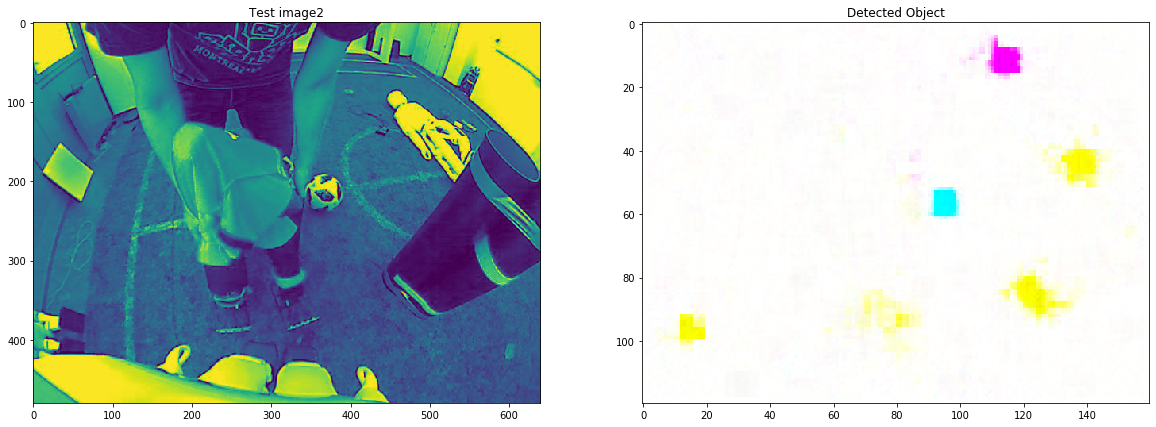

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


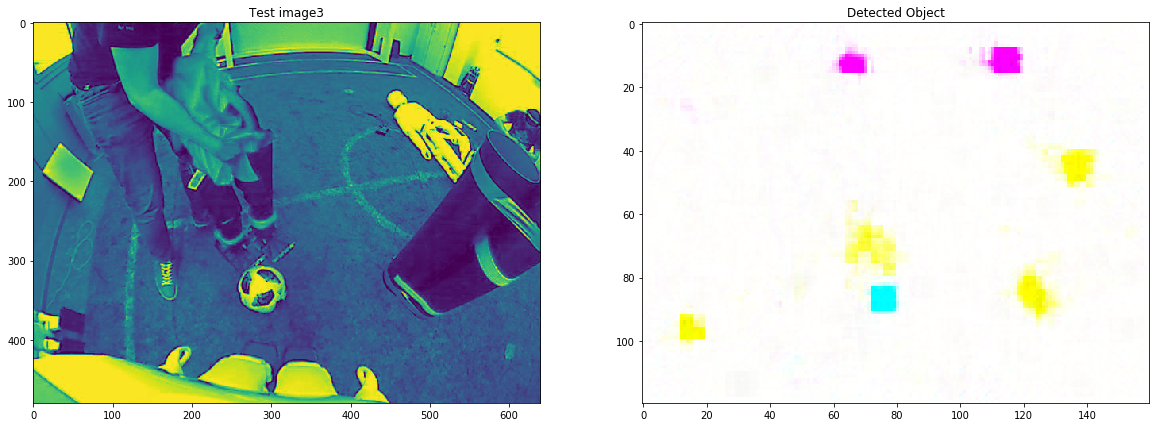

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


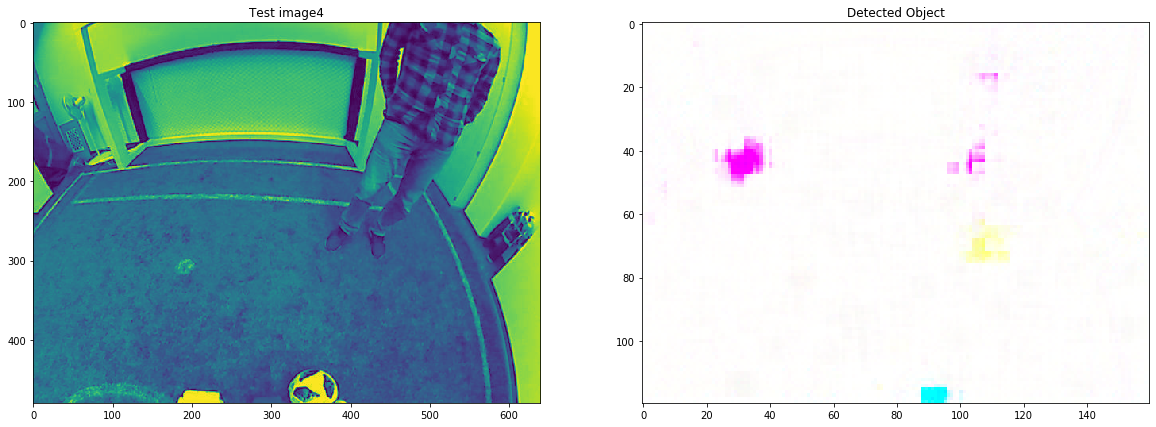

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


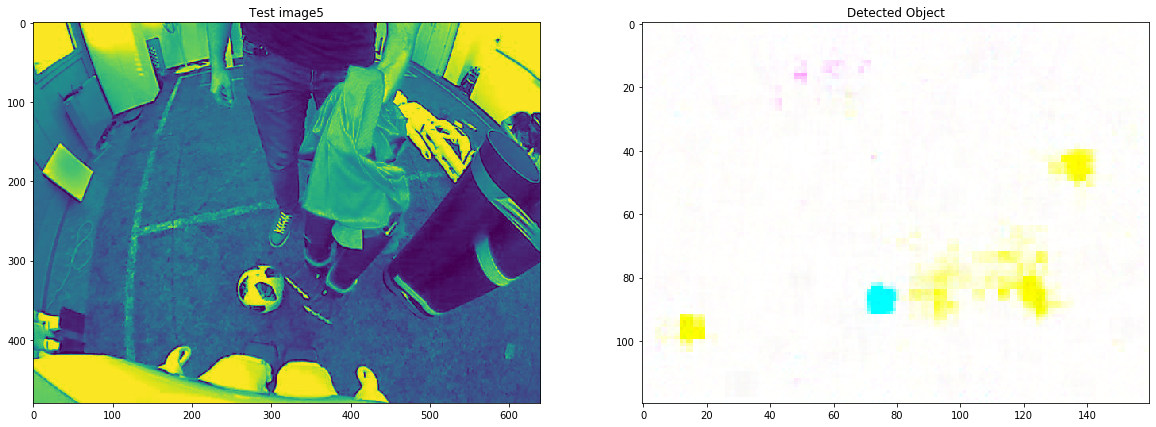

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


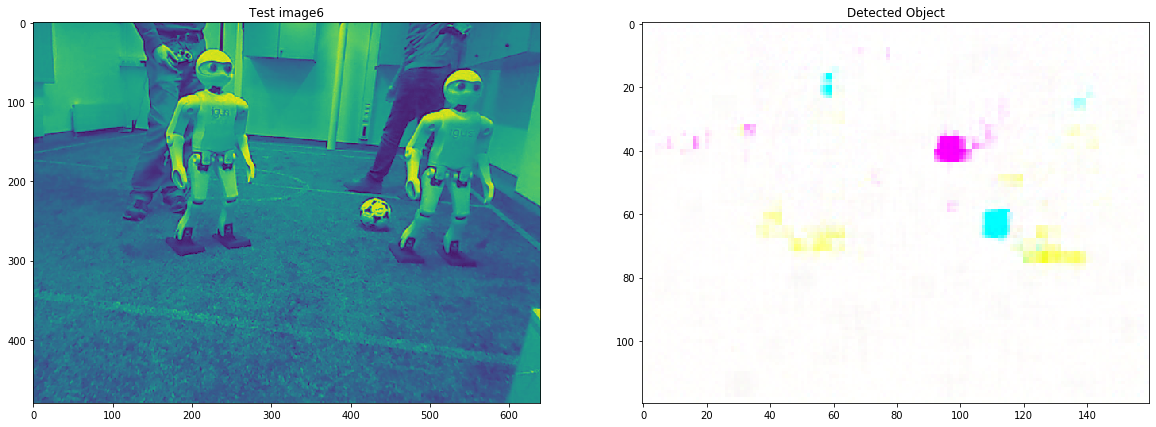

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


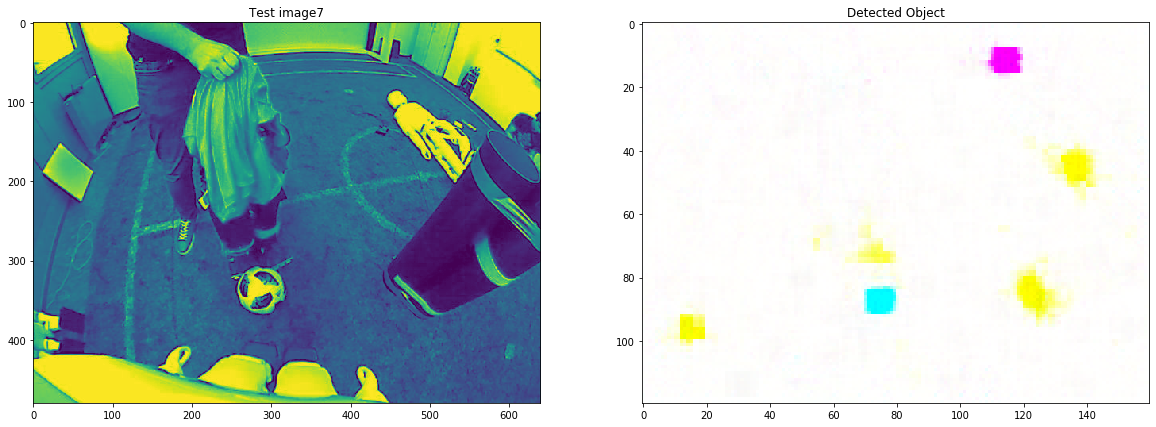

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


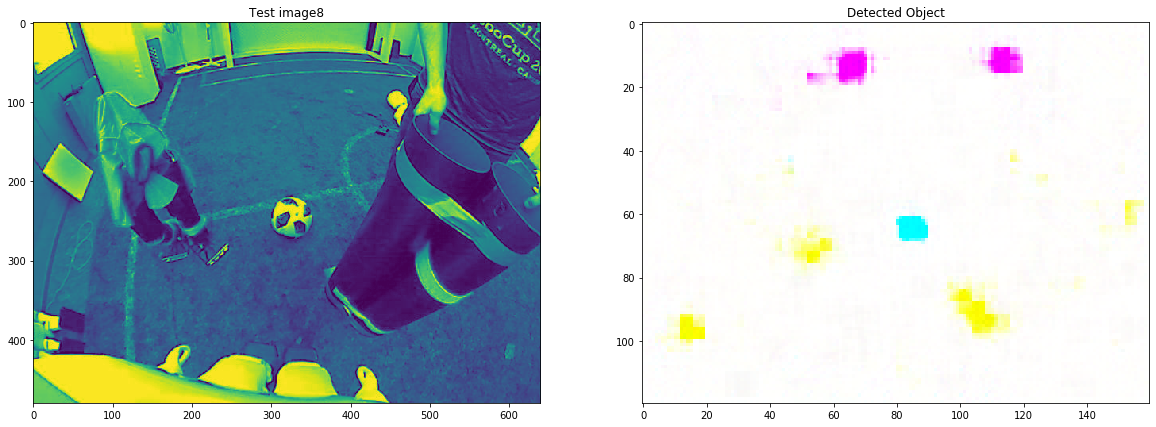

In [6]:
test_transforms = [Rescale((480,640)),
              ToTensor(), 
              Normalize([0.485, 0.456, 0.406], 
                        [0.229, 0.224, 0.225])]

test_dataset = BlobTestDataset(path = '../Project/data/blob/forceTest',transform=test_transforms)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=1, 
                                           shuffle=True)

seg_test_dataset = SegDataset(path = '../Project/data/segmentation/forceTrain',transform=None)
seg_test_loader = torch.utils.data.DataLoader(dataset=seg_test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

blob_test(model, test_loader, avDev)
blob_test_output(model, test_loader, avDev)

In [7]:
for j,test_data in enumerate(seg_test_loader):
      
    images = test_data[0].to(avDev)
    label = test_data[1].to(avDev)
    
    images.requires_grad_(False)
    label.requires_grad_(False)
    
    batch = test_data['image'].shape[0]
    
    for i in range(5):
        k += 1
        plt.figure(figsize=(40,20))
        plt.subplot(2,3,1)
        plt.title('Test image' + str(k))
        plt.imshow(images[0][i].cpu())
        out = model(images)
        plt.subplot(2,3,2)
        plt.title('Ball')
        plt.imshow(out[i][0].cpu().detach().numpy(), cmap= 'gray')
        plt.subplot(2,3,3)
        plt.title('Goalpost')
        plt.imshow(out[i][1].cpu().detach().numpy(), cmap= 'gray')
        plt.subplot(2,3,5)
        plt.title('Robot')
        plt.imshow(out[i][2].cpu().detach().numpy(), cmap= 'gray')
        plt.show()

TypeError: list indices must be integers or slices, not str